In [1]:
__author__ = "@Tssp"
__date__   = "10/01/2021"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(7802/4993)

1.250035048577335

In [5]:
print(os.getcwd())
folder_path = "Simulations/ix7802_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix7802_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70675', '.70685', '.70760', '.70765', '.707666', '.70770', '.70775', '.70780', '.70785', '.707891', '.70790', '.70795', '.70800', '.70805', '.70810', '.7081066', '.70815', '.70820', '.70825', '.70830', '.7083468', '.70835', '.70840', '.70845', '.708483', '.70850', '.70855', '.70860', '.70865', '.70870', '.70875', '.70880', '.708822', '.70885', '.70890', '.70895', '.70900', '.7090032', '.7090948', '.7092404', '.70905', '.70910', '.70915', '.7091583', '.70920', '.70925', '.70930', '.70935', '.70940', '.70945', '.70950', '.70955', '.70960', '.70965', '.70970', '.70975', '.70980', '.70985', '.70990', '.70995', '.71000', '.71005', '.71010', '.71015', '.71020', '.71025', '.71030', '.71035', '.71040', '.71045', '.71050', '.71055', '.71060', '.71065', '.71070', '.71075', '.71080', '.71085', '.71090', '.71095', '.71100', '.71105', '.71110', '.71115', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165'

In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1000

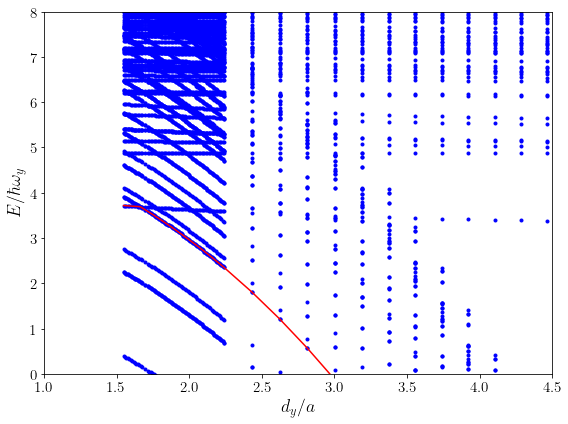

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(1, 4.5)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix7802_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

In [11]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


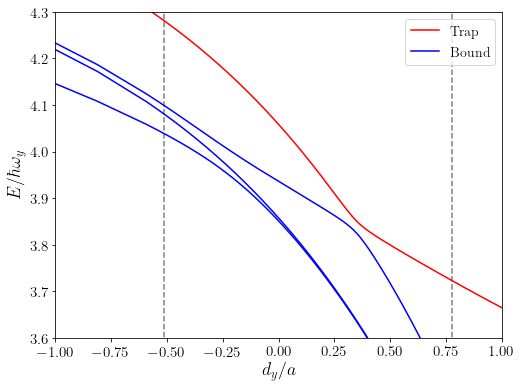

In [12]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b', label='Data')
ax2.vlines(x[-19], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.vlines(x[-140], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.set_ylim(3.6, 4.3)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
print(f'''To find the eigenstates:
x={x[-19]}, delta=0{delta[-19]}
x={x[-140]}, delta=0{delta[-140]}''')

To find the eigenstates:
x=-0.5116376524089361, delta=0.71760
x=0.7763496372772335, delta=0.71140


## Resonance x>1

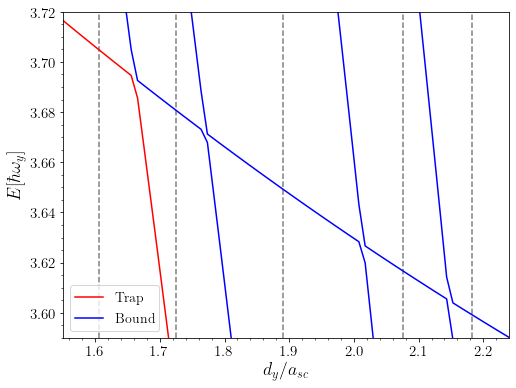

In [38]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r')
#for i in range(least_bound_pos+5, least_bound_pos + 11):
#    print(i)
#    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1006']/wy, 'b')
ax2.plot(x, dic['nivel_1007']/wy, 'b')
ax2.plot(x, dic['nivel_1009']/wy, 'b')
ax2.plot(x, dic['nivel_1010']/wy, 'b')
ax2.vlines(x[77], 3.4, 3.72, alpha=0.5, linestyles='--')
ax2.vlines(x[67], 3.4, 3.72, alpha=0.5, linestyles='--')
ax2.vlines(x[50], 3.4, 3.72, alpha=0.5, linestyles='--')
ax2.vlines(x[31], 3.4, 3.72, alpha=0.5, linestyles='--')
ax2.vlines(x[20], 3.4, 3.72, alpha=0.5, linestyles='--')
ax2.set_ylim(3.59, 3.72)
ax2.set_xlim(1.55, 2.24)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.set_xlabel('$d_{y}/a_{sc}$')
ax2.set_ylabel('$E$[$\hbar \omega_{y}$]')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix7190_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [39]:
print(f'''To find the eigenstates:
x={x[77]}, delta=0{delta[77]}
x={x[67]}, delta=0{delta[67]}
x={x[50]}, delta=0{delta[50]}
x={x[31]}, delta=0{delta[31]}
x={x[20]}, delta=0{delta[20]}''')

To find the eigenstates:
x=1.6065081472457023, delta=0.70725
x=1.724521288811593, delta=0.70665
x=1.8908607072310324, delta=0.70580
x=2.0756093092111287, delta=0.70485
x=2.182015554112263, delta=0.70430


In [1]:
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(3.59, 3.72)
ax2.set_xlim(1.55, 2.24)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 35:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

NameError: name 'plt' is not defined

In [45]:
%matplotlib inline

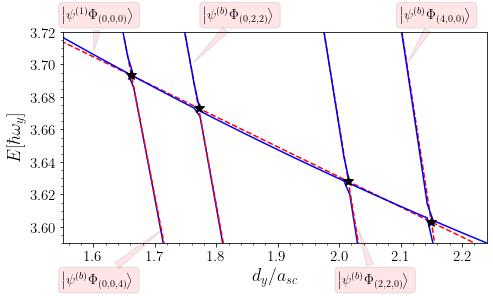

In [102]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1004:
f1004 = np.polyfit(xcoord, ycoord, deg=1)
x1004 = np.linspace(1.5, 2.30, num=40)
ax3.plot(x1004, np.polyval(f1004, x1004), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1004']/wy, 'b', label='Adiabatic')

# nivel 1005:
#ax3.plot(x, dic['nivel_1005']/wy, 'b')

# nivel 1006:
f1006 = np.polyfit(x[(x < 1.66) & (x > 1.64)], np.array(dic['nivel_1006'])[(x < 1.66) & (x > 1.64)]/wy, deg=1)
x1006 = np.linspace(1.65, 1.73, num=200)
ax3.plot(x1006, np.polyval(f1006, x1006), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1006']/wy, 'b')


# nivel 1007:
f1007 = np.polyfit(x[(x < 1.77) & (x > 1.73)], np.array(dic['nivel_1007'])[(x < 1.77) & (x > 1.73)]/wy, deg=1)
x1007 = np.linspace(1.74, 1.82, num=200)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1007']/wy, 'b')


# nivel 1008:
#ax3.plot(x, dic['nivel_1008']/wy, 'b')
#f1008 = np.polyfit(x[(x < 1.84) & (x > 1.82)], np.array(dic['nivel_1008'])[(x < 1.84) & (x > 1.82)]/wy, deg=1)
#x1008 = np.linspace(1.8, 1.86, num=500)
#ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)

# nivel 1009:
f1009 = np.polyfit(x[(x < 1.97) & (x > 1.93)], np.array(dic['nivel_1009'])[(x < 1.97) & (x > 1.93)]/wy, deg=1)
x1009 = np.linspace(1.9, 2.1, num=200)
ax3.plot(x1009, np.polyval(f1009, x1009), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x < 2.11) & (x > 1.98)], np.array(dic['nivel_1010'])[(x < 2.11) & (x > 1.98)]/wy, deg=1)
x1010 = np.linspace(2.1, 2.22, num=200)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1004, f1006), np.polyval(f1004, cross_points(f1004, f1006)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1009), np.polyval(f1004, cross_points(f1004, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.60, 3.707), xytext=(1.55, 3.728), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.717, 3.60), xytext=(1.55, 3.565), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.11, 3.70), xytext=(2.1, 3.728), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.78, 3.368), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.99, 3.55), xytext=(1.94, 3.524), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.76, 3.70), xytext=(1.78, 3.728), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(2.03, 3.60), xytext=(2.0, 3.565), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E$[$\hbar \omega_{y}$]')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.59, 3.72)
ax3.set_xlim(1.55, 2.24)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix7802_Iy4993_Iz4993_Easc_Interpolation.png', bbox_inches="tight", dpi=200)

In [69]:
print(f'''Crosses between (x, E):
* 1004-1006: ({cross_points(f1004, f1006)}, {np.polyval(f1004, cross_points(f1004, f1006))})
* 1004-1007: ({cross_points(f1004, f1007)}, {np.polyval(f1004, cross_points(f1004, f1007))})
* 1004-1009: ({cross_points(f1004, f1009)}, {np.polyval(f1004, cross_points(f1004, f1009))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1006: (1.661740357631114, 3.693236957370509)
* 1004-1007: (1.7712199230953434, 3.673021379947483)
* 1004-1009: (2.014993201986142, 3.6280082528658646)
* 1004-1010: (2.1501309806043927, 3.603054845215324)


In [70]:
print(f'''ICIR: asc/dy:
* 1004-1006: {1/cross_points(f1004, f1006)}
* 1004-1007: {1/cross_points(f1004, f1007)} 
* 1004-1009: {1/cross_points(f1004, f1009)}
* 1004-1010: {1/cross_points(f1004, f1010)}''')

ICIR: asc/dy:
* 1004-1006: 0.6017787287934351
* 1004-1007: 0.5645826285944339 
* 1004-1009: 0.4962795899332654
* 1004-1010: 0.46508794534875464


In [71]:
np.savetxt('Results/ICIR_positions_7802_4993_4993.txt', 
           [[1.25, 1.25, 1.25, 1.25], [1/cross_points(f1004, f1006), 1/cross_points(f1004, f1007), 1/cross_points(f1004, f1009), 1/cross_points(f1004, f1010)], 
            [np.polyval(f1004, cross_points(f1004, f1006)), np.polyval(f1004, cross_points(f1004, f1007)), np.polyval(f1004, cross_points(f1004, f1009)) ,np.polyval(f1004, cross_points(f1004, f1010))]], 
           header='wx/wy, asc/dy, E/hwy', )